# **Real-time Convolutional Neural Networks for Emotion Classification** <br>

**Final year project by David Cardoso <br> May 2022**


---

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "osodracd" 
os.environ['KAGGLE_KEY'] = "11a9863858d0062c2831af8daa9aad7a"
if 'KAGGLE_USERNAME' and 'KAGGLE_KEY' != None:
  print("Kaggle API sucessfully loaded")

Kaggle API sucessfully loaded


In [2]:
# Tensorflow updgrade
!pip install --upgrade tensorflow
# Kaggle installation
! pip install kaggle
# Create Kaggle directory
! mkdir ~/.kaggle
# Copy the kaggle.json file into the current directory
! cp kaggle.json ~/.kaggle/
# provide owner full read and write access to the file
! chmod 600 ~/.kaggle/kaggle.json
# Download the dataset zip file
! kaggle datasets download msambare/fer2013
# Extract the files withtin the zip file
! unzip fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

## **Import libraries and modules**

Now that the dataset is downloaded and accessible, I will import all the necessary libraries and modules.

In [3]:
# Import statements
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
import tensorflow as tf

from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Conv2D, Dense, Input, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization, Activation, Embedding, LSTM, LeakyReLU
from tensorflow.keras import models, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

Set directories

In [4]:
# Directories 
train_dir = "/content/train"
test_dir = "/content/test"

Lets peek the dataset.

In [5]:
# Standardized size of images
picture_size = 48
folder_path = "/content/"

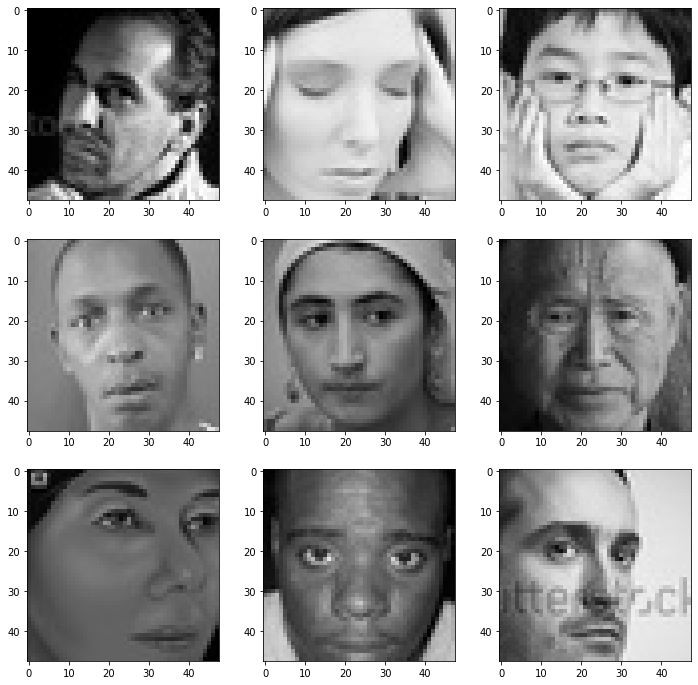

Example of neutral faces.


In [6]:
# Plotting neutral images from the folder
expression = "neutral"
# Defining mapplotlib graph
plt.figure(figsize=(12, 12))
# Plotting first 9 images
for i in range (1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path+"train/"+expression+"/" + os.listdir(folder_path+"train/"+expression)[i],target_size= (picture_size, picture_size))
    plt.imshow(img)
plt.show()
print('Example of ' + expression + ' faces.')

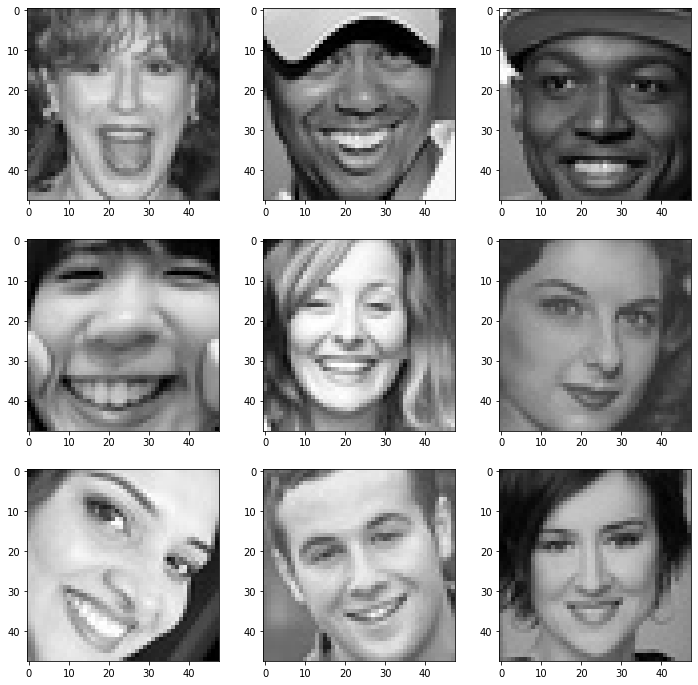

Example of happy faces.


In [7]:
# Test plotting for a different expression
expression = "happy"
# Defining mapplotlib graph
plt.figure(figsize=(12, 12))
# Plotting first 9 images
for i in range (1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path+"train/"+expression+"/" + os.listdir(folder_path+"train/"+expression)[i],target_size= (picture_size, picture_size))
    plt.imshow(img)
plt.show()
print('Example of ' + expression + ' faces.')

## **Data distribuition**
Now I will find the data distribuition among the different emotions.

In [8]:
#Train distribuition
train_angry_list = os.listdir('/content/train/angry')
train_disgust_list = os.listdir('/content/train/disgust')
train_fear_list = os.listdir('/content/train/fear')
train_happy_list = os.listdir('/content/train/happy')
train_neutral_list = os.listdir('/content/train/neutral')
train_sad_list = os.listdir('/content/train/sad')
train_surprise_list = os.listdir('/content/train/surprise')

train_angry_list = len(train_angry_list)
train_disgust_list = len(train_disgust_list)
train_fear_list = len(train_fear_list)
train_happy_list = len(train_happy_list)
train_neutral_list = len(train_neutral_list)
train_sad_list = len(train_sad_list)
train_surprise_list = len(train_surprise_list)

#Test distribuition
test_angry_list = os.listdir('/content/test/angry')
test_disgust_list = os.listdir('/content/test/disgust')
test_fear_list = os.listdir('/content/test/fear')
test_happy_list = os.listdir('/content/test/happy')
test_neutral_list = os.listdir('/content/test/neutral')
test_sad_list = os.listdir('/content/test/sad')
test_surprise_list = os.listdir('/content/test/surprise')

test_angry_list = len(test_angry_list)
test_disgust_list = len(test_disgust_list)
test_fear_list = len(test_fear_list)
test_happy_list = len(test_happy_list)
test_neutral_list = len(test_neutral_list)
test_sad_list = len(test_sad_list)
test_surprise_list = len(test_surprise_list)

print("****** Train set ******")
print("Number of angry images:    ", train_angry_list)
print("Number of disgust images:  ", train_disgust_list)
print("Number of fear images:     ", train_fear_list)
print("Number of happy images:    ", train_happy_list)
print("Number of neutral images:  ", train_neutral_list)
print("Number of sad images:      ", train_sad_list)
print("Number of surprise images: ", train_surprise_list)
print()
print("****** Test set ******")
print("Number of angry images:    ", test_angry_list)
print("Number of disgust images:  ", test_disgust_list)
print("Number of fear images:     ", test_fear_list)
print("Number of happy images:    ", test_happy_list)
print("Number of neutral images:  ", test_neutral_list)
print("Number of sad images:      ", test_sad_list)
print("Number of surprise images: ", test_surprise_list)

****** Train set ******
Number of angry images:     3995
Number of disgust images:   436
Number of fear images:      4097
Number of happy images:     7215
Number of neutral images:   4965
Number of sad images:       4830
Number of surprise images:  3171

****** Test set ******
Number of angry images:     958
Number of disgust images:   111
Number of fear images:      1024
Number of happy images:     1774
Number of neutral images:   1233
Number of sad images:       1247
Number of surprise images:  831


### **Evaluation protocol**

In [9]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 132)
# shutil module already imported above

# Create new dataset directory
my_dataset_dir = '/content/my_dataset'
os.mkdir(my_dataset_dir)

In [10]:
# Create subdirectory for training samples (partial training set + validation set samples)
train_dir = os.path.join(my_dataset_dir, 'train')
os.mkdir(train_dir)

# create subdirectory for partial training 
partialtrain_dir = os.path.join(my_dataset_dir, 'partialtrain')
os.mkdir(partialtrain_dir)

# create subdirectory for validation samples
validation_dir = os.path.join(my_dataset_dir, 'validation')
os.mkdir(validation_dir)

# Create subdirectory for test samples
test_dir = os.path.join(my_dataset_dir, 'test')
os.mkdir(test_dir)

In [11]:
# Create new training directories subfolders

# Angry
train_angry_dir = os.path.join(train_dir, 'angry')
os.mkdir(train_angry_dir)

# Disgust
train_disgut_dir = os.path.join(train_dir, 'disgust')
os.mkdir(train_disgut_dir)

# Fear 
train_fear_dir = os.path.join(train_dir, 'fear')
os.mkdir(train_fear_dir)

# Happy 
train_happy_dir = os.path.join(train_dir, 'happy')
os.mkdir(train_happy_dir)

# Neutral
train_neutral_dir = os.path.join(train_dir, 'neutral')
os.mkdir(train_neutral_dir)

# Sad 
train_sad_dir = os.path.join(train_dir, 'sad')
os.mkdir(train_sad_dir)

# Surprise
train_surprise_dir = os.path.join(train_dir, 'surprise')
os.mkdir(train_surprise_dir)

In [12]:
# Create partial train directories subfolders

# Angry
partialtrain_angry_dir = os.path.join(partialtrain_dir, 'angry')
os.mkdir(partialtrain_angry_dir)

# Disgut
partialtrain_disgust_dir = os.path.join(partialtrain_dir, 'disgust')
os.mkdir(partialtrain_disgust_dir)

# Fear 
partialtrain_fear_dir = os.path.join(partialtrain_dir, 'fear')
os.mkdir(partialtrain_fear_dir)

# Happy 
partialtrain_happy_dir = os.path.join(partialtrain_dir, 'happy')
os.mkdir(partialtrain_happy_dir)

# Neutral
partialtrain_neutral_dir = os.path.join(partialtrain_dir, 'neutral')
os.mkdir(partialtrain_neutral_dir)

# Sad 
partialtrain_sad_dir = os.path.join(partialtrain_dir, 'sad')
os.mkdir(partialtrain_sad_dir)

# Surprise
partialtrain_surprise_dir = os.path.join(partialtrain_dir, 'surprise')
os.mkdir(partialtrain_surprise_dir)

In [13]:
# Create new validation directories subfolders

# Angry
validation_angry_dir = os.path.join(validation_dir, 'angry')
os.mkdir(validation_angry_dir)

# Disgust
validation_disgust_dir = os.path.join(validation_dir, 'disgust')
os.mkdir(validation_disgust_dir)

# Fear 
validation_fear_dir = os.path.join(validation_dir, 'fear')
os.mkdir(validation_fear_dir)

# Happy 
validation_happy_dir = os.path.join(validation_dir, 'happy')
os.mkdir(validation_happy_dir)

# Neutral
validation_neutral_dir = os.path.join(validation_dir, 'neutral')
os.mkdir(validation_neutral_dir)

# Sad 
validation_sad_dir = os.path.join(validation_dir, 'sad')
os.mkdir(validation_sad_dir)

# Surprise
validation_surprise_dir = os.path.join(validation_dir, 'surprise')
os.mkdir(validation_surprise_dir)

In [14]:
# Create new test directories subfolders

# Angry
test_angry_dir = os.path.join(test_dir, 'angry')
os.mkdir(test_angry_dir)

# Disgust
test_disgust_dir = os.path.join(test_dir, 'disgust')
os.mkdir(test_disgust_dir)

# Fear 
test_fear_dir = os.path.join(test_dir, 'fear')
os.mkdir(test_fear_dir)

# Happy 
test_happy_dir = os.path.join(test_dir, 'happy')
os.mkdir(test_happy_dir)

# Neutral
test_neutral_dir = os.path.join(test_dir, 'neutral')
os.mkdir(test_neutral_dir)

# Sad 
test_sad_dir = os.path.join(test_dir, 'sad')
os.mkdir(test_sad_dir)

# Surprise
test_surprise_dir = os.path.join(test_dir, 'surprise')
os.mkdir(test_surprise_dir)

In [15]:
# Copying images to new training, partial training and validation directories
# Code adapted from "Deep Learning With Python" - Francois Chollet (Pages 132-133)

# Copying Train set

## Angry emotion
  # Create a list of all images in the original train angry folder
imageslist = os.listdir('/content/train/angry')
  # Format the new filenames and store 3995 images in an array
fnames = ['angry{}.jpg'.format(i) for i in range(3995)]
  # Copy the 3995 images to train/angry folder
for j in range(3995):
  src = os.path.join('/content/train/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/train/angry', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 3595 images to partialtrain/angry folder
for j in range(3595):
  src = os.path.join('/content/train/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/partialtrain/angry', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 400 images to validation/angry folder
for j in range(3595,3995):
  src = os.path.join('/content/train/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/validation/angry',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Disgust emotion
  # Create a list of all images in the original train disgust folder
imageslist = os.listdir('/content/train/disgust')
  # Format the new filenames and store 436 images in an array
fnames = ['disgust{}.jpg'.format(i) for i in range(436)]
  # Copy the 426 images to train/disgust folder
for j in range(426):
  src = os.path.join('/content/train/disgust', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/train/disgust', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 392 images to partialtrain/disgust folder
for j in range(392):
  src = os.path.join('/content/train/disgust', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/partialtrain/disgust', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 87 images to validation/disgust folder
for j in range(392,426):
  src = os.path.join('/content/train/disgust', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/validation/disgust',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Fear emotion
  # Create a list of all images in the original train fear folder
imageslist = os.listdir('/content/train/fear')
  # Format the new filenames and store 4097 images in an array
fnames = ['fear{}.jpg'.format(i) for i in range(4097)]
  # Copy the 4097 images to train/fear folder
for j in range(4097):
  src = os.path.join('/content/train/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/train/fear', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 3687 images to partialtrain/fear folder
for j in range(3687):
  src = os.path.join('/content/train/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/partialtrain/fear', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 410 images to validation/fear folder
for j in range(3687,4097):
  src = os.path.join('/content/train/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/validation/fear',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Happy emotion
  # Create a list of all images in the original train happy folder
imageslist = os.listdir('/content/train/happy')
  # Format the new filenames and store 7215 images in an array
fnames = ['happy{}.jpg'.format(i) for i in range(7215)]
  # Copy the 7215 images to train/happy folder
for j in range(7215):
  src = os.path.join('/content/train/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/train/happy', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 6493 images to partialtrain/happy folder
for j in range(6493):
  src = os.path.join('/content/train/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/partialtrain/happy', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 720 images to validation/happy folder
for j in range(6493,7215):
  src = os.path.join('/content/train/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/validation/happy',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Neutral emotion
  # Create a list of all images in the original train neutral folder
imageslist = os.listdir('/content/train/neutral')
  # Format the new filenames and store 3171 images in an array
fnames = ['neutral{}.jpg'.format(i) for i in range(4965)]
  # Copy the 4965 images to train/happy folder
for j in range(4965):
  src = os.path.join('/content/train/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/train/neutral', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 4468 images to partialtrain/neutral folder
for j in range(4468):
  src = os.path.join('/content/train/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/partialtrain/neutral', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 497 images to validation/neutral folder
for j in range(4468,4965):
  src = os.path.join('/content/train/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/validation/neutral',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Sad emotion
  # Create a list of all images in the original train sad folder
imageslist = os.listdir('/content/train/sad')
  # Format the new filenames and store 4830 images in an array
fnames = ['sad{}.jpg'.format(i) for i in range(4830)]
  # Copy the 4830 images to train/sad folder
for j in range(4830):
  src = os.path.join('/content/train/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/train/sad', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 4347 images to partialtrain/sad folder
for j in range(4347):
  src = os.path.join('/content/train/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/partialtrain/sad', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 483 images to validation/sad folder
for j in range(4347,4830):
  src = os.path.join('/content/train/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/validation/sad',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Surprise emotion
  # Create a list of all images in the original train surprise folder
imageslist = os.listdir('/content/train/surprise')
  # Format the new filenames and store 3171 images in an array
fnames = ['surprise{}.jpg'.format(i) for i in range(3171)]
  # Copy the 3171 images to train/surprise folder
for j in range(3171):
  src = os.path.join('/content/train/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/train/surprise', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the first 2854 images to partialtrain/surprise folder
for j in range(2854):
  src = os.path.join('/content/train/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/partialtrain/surprise', fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)
  # Copy the next 317 images to validation/surprise folder
for j in range(2854,3171):
  src = os.path.join('/content/train/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/validation/surprise',fnames[j]) # destination of the new dataset folder
  shutil.copyfile(src, dst)

In [16]:
# Copying images to new test directories
# Code adapted from "Deep Learning With Python" - Francois Chollet (Pages 132-133)

# Copying Test set
## Angry emotion
  # Create a list of all images in the original test angry folder
imageslist = os.listdir('/content/test/angry')
  # Format the new filenames and store 958 images in an array
fnames = ['angry{}.jpg'.format(i) for i in range(958)]
  # Copy the 958 images to test/angry folder
for j in range(958):
  src = os.path.join('/content/test/angry', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/test/angry', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Disgust emotion
  # Create a list of all images in the original test disgust folder
imageslist = os.listdir('/content/test/disgust')
  # Format the new filenames and store 111 images in an array
fnames = ['disgust{}.jpg'.format(i) for i in range(111)]
  # Copy the 111 images to test/disgust folder
for j in range(111):
  src = os.path.join('/content/test/disgust', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/test/disgust', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Fear emotion
  # Create a list of all images in the original test fear folder
imageslist = os.listdir('/content/test/fear')
  # Format the new filenames and store 1024 images in an array
fnames = ['fear{}.jpg'.format(i) for i in range(1024)]
  # Copy the 1024 images to test/fear folder
for j in range(1024):
  src = os.path.join('/content/test/fear', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/test/fear', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)
 
## Happy emotion
  # Create a list of all images in the original test happy folder
imageslist = os.listdir('/content/test/happy')
  # Format the new filenames and store 1774 images in an array
fnames = ['happy{}.jpg'.format(i) for i in range(1774)]
  # Copy the 1774 images to test/happy folder
for j in range(1774):
  src = os.path.join('/content/test/happy', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/test/happy', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Neutral emotion
  # Create a list of all images in the original test neutral folder
imageslist = os.listdir('/content/test/neutral')
  # Format the new filenames and store 1233 images in an array
fnames = ['neutral{}.jpg'.format(i) for i in range(1233)]
  # Copy the 1233 images to test/happy folder
for j in range(1233):
  src = os.path.join('/content/test/neutral', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/test/neutral', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Sad emotion
  # Create a list of all images in the original test sad folder
imageslist = os.listdir('/content/test/sad')
  # Format the new filenames and store 1247 images in an array
fnames = ['sad{}.jpg'.format(i) for i in range(1247)]
  # Copy the 1247 images to test/sad folder
for j in range(1247):
  src = os.path.join('/content/test/sad', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/test/sad', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

## Surprise emotion
    # Create a list of all images in the original test sad folder
imageslist = os.listdir('/content/test/surprise')
  # Format the new filenames and store 831 images in an array
fnames = ['surprise{}.jpg'.format(i) for i in range(831)]
  # Copy the last 831 images to test/surprise folder
for j in range(831):
  src = os.path.join('/content/test/surprise', imageslist[j]) # source of the original dataset folder
  dst = os.path.join('/content/my_dataset/test/surprise', fnames[j])  # destination of the new dataset folder
  shutil.copyfile(src, dst)

In [17]:
# Sanity check
print('Training images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/my_dataset/train/angry')))
print('Total disgust emotion images:  ', len(os.listdir('/content/my_dataset/train/disgust')))
print('Total fear emotion images:     ', len(os.listdir('/content/my_dataset/train/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/my_dataset/train/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/my_dataset/train/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/my_dataset/train/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/my_dataset/train/surprise')))
print()
print('Partial training images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/my_dataset/partialtrain/angry')))
print('Total disgust emotion images:     ', len(os.listdir('/content/my_dataset/partialtrain/disgust')))
print('Total fear emotion images:     ', len(os.listdir('/content/my_dataset/partialtrain/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/my_dataset/partialtrain/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/my_dataset/partialtrain/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/my_dataset/partialtrain/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/my_dataset/partialtrain/surprise')))
print()
print('Validation training images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/my_dataset/validation/angry')))
print('Total disgust emotion images:  ', len(os.listdir('/content/my_dataset/validation/disgust')))
print('Total fear emotion images:     ', len(os.listdir('/content/my_dataset/validation/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/my_dataset/validation/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/my_dataset/validation/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/my_dataset/validation/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/my_dataset/validation/surprise')))
print()
print('Test images'), 
print('Total angry emotion images:    ', len(os.listdir('/content/my_dataset/test/angry')))
print('Total fear emotion images:     ', len(os.listdir('/content/my_dataset/test/fear')))
print('Total happy emotion images:    ', len(os.listdir('/content/my_dataset/test/happy')))
print('Total neutral emotion images:  ', len(os.listdir('/content/my_dataset/test/neutral')))
print('Total sad emotion images:      ', len(os.listdir('/content/my_dataset/test/sad')))
print('Total surprise emotion images: ', len(os.listdir('/content/my_dataset/test/surprise')))

Training images
Total angry emotion images:     3995
Total disgust emotion images:   426
Total fear emotion images:      4097
Total happy emotion images:     7215
Total neutral emotion images:   4965
Total sad emotion images:       4830
Total surprise emotion images:  3171

Partial training images
Total angry emotion images:     3595
Total disgust emotion images:      392
Total fear emotion images:      3687
Total happy emotion images:     6493
Total neutral emotion images:   4468
Total sad emotion images:       4347
Total surprise emotion images:  2854

Validation training images
Total angry emotion images:     400
Total disgust emotion images:   34
Total fear emotion images:      410
Total happy emotion images:     722
Total neutral emotion images:   497
Total sad emotion images:       483
Total surprise emotion images:  317

Test images
Total angry emotion images:     958
Total fear emotion images:      1024
Total happy emotion images:     1774
Total neutral emotion images:   1233
T

## **Data Preprocessing**

In [18]:
# Code from "Deep Learning With Python" - Francois Chollet (Pages 135)

#rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
partial_train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Training data prepocessing
train_generator = train_datagen.flow_from_directory(
    train_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # the number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

# Training data prepocessing
partial_train_generator = partial_train_datagen.flow_from_directory(
    partialtrain_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # the number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

#  Validation data preprocessing
validation_generator = val_datagen.flow_from_directory(
    validation_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

# Test data prepocessing
test_generator = train_datagen.flow_from_directory(
    test_dir, # target directory
    target_size=(150, 150), # resize images to 150x150
    batch_size=20, # the number of samples in each batch
    class_mode='categorical') # categorical mode instead of binary mode for having multiple categories

Found 28699 images belonging to 7 classes.
Found 25836 images belonging to 7 classes.
Found 2863 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Prepocessing complete, is now possible to look at the output of the generators.

In [19]:
# Code from "Deep Learning With Python" - Francois Chollet (Page 136)

for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 7)


The balanced dataset is now ready to be used by neural networks which concludes the fourth park of the universal workflow. Next, I will develop a model that does better than a baseline.

## **ReLU Activation function models implementation**

In [20]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 137)
# This model function take number of epochs as input

def train_epochs(model, epochs):

  trained_model = model.fit(
      partial_train_generator,
      steps_per_epoch=25,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=25,
      callbacks = earlystop)
  
  return trained_model

In [21]:
# Callback to find the optimal epoch

earlystop = EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=40,
                        verbose=1,
                        restore_best_weights=True)

In [22]:
# Data augmentation on disgust

#datagen = ImageDataGenerator(
  #rotation_range=40,
  #width_shift_range=0.2,
  #height_shift_range=0.2,
  #shear_range=0.2,
  #zoom_range=0.2,
  #horizontal_flip=True,
  #fill_mode='nearest')

#img = load_img('/content/train/disgust')



In [23]:
def train_final(model, epochs):

  trained_model = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=epochs)
  
  return trained_model

In [24]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 137)
# This model function plots loss and accuracy over training and validation durting training

def plot_loss_acc():

  acc = model.history['acc']
  val_acc = model.history['val_acc']
  loss = model.history['loss']
  val_loss = model.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [25]:
def plot_results():
  pd.DataFrame(model.history.history).plot(figsize=(8,5))
  plt.grid(True)
  plt.gca().set_ylim(0,1)
  plt.show()

In [26]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 120)
# Function to build the baseline model

def build_model_baseline():

  # Built network
    # Layers and models modules already imported above

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  # Classifier network
  model.add(layers.Flatten()) # Flatten the 3d outputs to 1d before adding Dense layers on top
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(7, activation='softmax')) # Final layer has 7 outputs with a softmax activation as expected for this type of task

  # Import optimizers
    # Optimizers module already imported above

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model

In [27]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 137)
# This model function take input as number of filters per convnet layer

def build_model_outfits (filter1, filter2, filter3):
  
  # Instantiate model
  model = models.Sequential()

  # Convnet - this convnet has more layers, with the number of filters per each layer being set by the arguments
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter3, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(7, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model  

In [28]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 120)
# Function to build the batch normalization model

def build_model_batch(filter1, filter2):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.BatchNormalization())  # Batch normalization layers added after a Conv layer .This is an advanced technique
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())  # Batch normalization layers added after a Conv layer .This is an advanced technique
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())  # Batch normalization layers added after a Conv layer .This is an advanced technique
  model.add(layers.MaxPooling2D((2, 2)))
  
  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(7, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model

In [29]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 141)
# Function to build the dropout model

def build_model_dropout(filter1, filter2, dropout):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout)) # Dropout layer added before the densely connected classifier
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(7, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['acc'])
  
  model.summary()
  return model

In [30]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 141)
# Function to build the learning rate model

def build_model_learning_rate(filter1, filter2, dropout, learning_rate):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout)) # Dropout layer added before the densely connected classifier
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(7, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=learning_rate),
                metrics=['acc'])
  
  model.summary()
  return model

In [31]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 141)
# Function to build the adam model

def build_model_adam_relu(filter1, filter2, dropout):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout)) # Dropout layer added before the densely connected classifier
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(7, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['acc'])
  
  model.summary()
  return model

In [32]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 141)
# Function to build the adam model

def build_model_adam_leakyrelu(filter1, filter2, dropout):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout)) # Dropout layer added before the densely connected classifier
  model.add(layers.Dense(64, activation='LeakyReLU'))
  model.add(layers.Dense(7, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['acc'])
  
  model.summary()
  return model

In [33]:
# Code adapted from "Deep Learning With Python" - Francois Chollet (Page 141)
# Function to build the L1+L2 model

def build_model_L1L2(filter1, filter2, dropout):

  # Instantiate model
  model = models.Sequential()

  # Convnet
  model.add(layers.Conv2D(filter1, (3, 3), activation='relu', input_shape=(150, 150, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(filter2, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))

  # Classifier network
  model.add(layers.Flatten())
  model.add(layers.Dropout(dropout)) # Dropout layer added before the densely connected classifier
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
  model.add(layers.Dense(7, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy',
                optimizer='RMSprop',
                metrics=['acc'])
  
  model.summary()
  return model

### **Baseline Model** <a class="anchor" id="basemodel"></a>

In [ ]:
model = build_model_baseline()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 23s 824ms/step - loss: 3.9421 - acc: 0.1880 - val_loss: 1.8851 - val_acc: 0.1880
Epoch 2/150
25/25 [==============================] - 16s 652ms/step - loss: 1.8723 - acc: 0.2080 - val_loss: 1.8072 - val_acc: 0.2800
Epoch 3/150
25/25 [==============================] - 17s 677ms/step - loss: 1.8755 - acc: 0.2380 - val_loss: 2.6737 - val_acc: 0.2360
Epoch 4/150
25/25 [==============================] - 16s 646ms/step - loss: 1.8545 - acc: 0.2440 - val_loss: 1.8347 - val_acc: 0.1340
Epoch 5/150
25/25 [==============================] - 16s 642ms/step - loss: 1.8281 - acc: 0.2300 - val_loss: 1.8384 - val_acc: 0.1660
Epoch 6/150
25/25 [==============================] - 16s 637ms/step - loss: 1.8047 - acc: 0.2720 - val_loss: 1.7594 - val_acc: 0.3080
Epoch 7/150
25/25 [==============================] - 16s 641ms/step - loss: 1.7300 - acc: 0.3140 - val_loss: 1.7501 - val_acc: 0.3020
Epoch 8/150
25/25 [==============================] - 16s 635ms

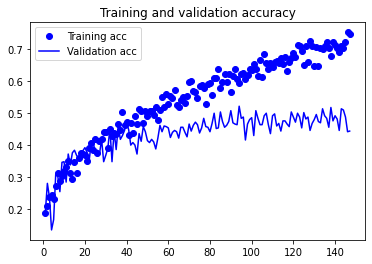

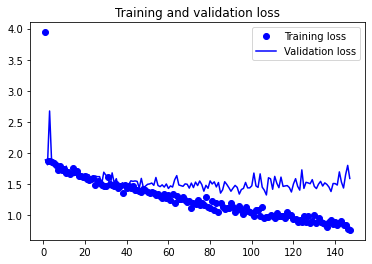

In [ ]:
plot_loss_acc()

| Model Number  | Model Name | Optimal Epoch  | Validation Loss  | Validation Accuracy | 
| ------------ | ------------ | ------------ | ------------ | ------------ 
| 0 		| baseline  | N/A | N/A  | 16.66% |
| 1 |statistical power |  74  |1.3039   |51.60%| 

Following the build and train of the baseline model, I have found that the optimal number of epochs for this model is 45 where it reached the lowest value of validation loss at 1.4233 and reached the highest value of valuation accuracy at 0.4680, which translate into 46.80% of accuracy. 

Considering that the threshold for a correct random pick was 16.66%, it is undeniable that this model has statistical power. This model is capable of performing better than a dumb baseline, as the one set above, so I will continue to the next part of the universal workflow.

### **Outfitting model**

Having proved that the model has statistical power, it is time to greatly scale the model in order to find the point where validation starts overfits and therefore find this model optimal number of epochs. Epochs are the number of times that the network iterates over all samples. Knowning this will produce a model that will run enough times to prevent underfitting that will stop before reaching overfitting, therefore improving the efficiency of the network.

My scale up function will have more and bigger layers. As can be seen in the next block of code, this model definition have a stack of four Conv2D layers, each one followed by a MaxPooling2D layer, a flatten layer and two Dense layers at the bottom. The input arguments are the filters to each layer that it applies. In this model I will use 32, 64 and 128 filters. By doing so I make sure that the model will overfits.

In [ ]:
model = build_model_outfits(32,64,128)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 24s 923ms/step - loss: 1.9812 - acc: 0.1640 - val_loss: 1.8509 - val_acc: 0.2300
Epoch 2/150
25/25 [==============================] - 23s 915ms/step - loss: 1.8793 - acc: 0.2260 - val_loss: 1.8113 - val_acc: 0.2300
Epoch 3/150
25/25 [==============================] - 23s 911ms/step - loss: 1.8391 - acc: 0.2220 - val_loss: 1.8260 - val_acc: 0.2320
Epoch 4/150
25/25 [==============================] - 23s 910ms/step - loss: 1.8080 - acc: 0.2880 - val_loss: 1.7932 - val_acc: 0.2600
Epoch 5/150
25/25 [==============================] - 23s 910ms/step - loss: 1.8161 - acc: 0.2480 - val_loss: 1.8040 - val_acc: 0.2620
Epoch 6/150
25/25 [==============================] - 23s 913ms/step - loss: 1.8371 - acc: 0.2460 - val_loss: 1.7844 - val_acc: 0.2440
Epoch 7/150
25/25 [==============================] - 22s 906ms/step - loss: 1.7887 - acc: 0.2720 - val_loss: 1.7930 - val_acc: 0.2560
Epoch 8/150
25/25 [==============================] - 22s 904ms

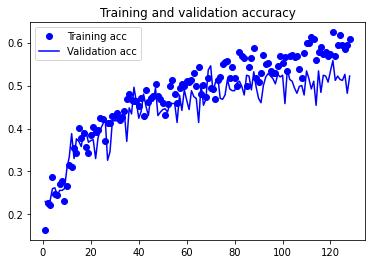

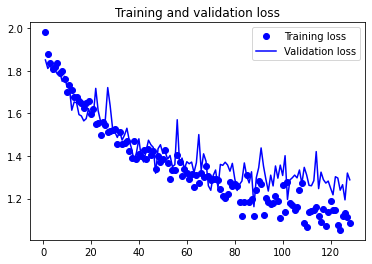

In [ ]:
plot_loss_acc()

## **Regularizing and tuning**

 By shifting the model’s hyperparameters, in line with the model’s performance as feedback, I expect to find the optimal model configuration.

I will explore:


*   Batch normalization
*   Dropout with different values for comparison
*   Learning rate with different values for comparison


For this 3 different aspects I will run distinct models and produce graphs of the model’s performance.

### **Batch normalization model** <a class="anchor" id="batch"></a>

In this model I will use batch normalization.

The main improvement produced by batch normalization is assisting with gradient propagation, enabling the use of deeper networks. Its layer usually sits after a convolutional or densely connected layer.

This model definition can be seen in the next code block.

In [ ]:
model = build_model_batch(32, 64)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 31s 1s/step - loss: 7.1635 - acc: 0.1760 - val_loss: 3.6084 - val_acc: 0.0480
Epoch 2/150
25/25 [==============================] - 29s 1s/step - loss: 2.4531 - acc: 0.2360 - val_loss: 5.2484 - val_acc: 0.1060
Epoch 3/150
25/25 [==============================] - 30s 1s/step - loss: 2.3336 - acc: 0.2080 - val_loss: 4.7744 - val_acc: 0.1400
Epoch 4/150
25/25 [==============================] - 29s 1s/step - loss: 2.1355 - acc: 0.2620 - val_loss: 4.5422 - val_acc: 0.1840
Epoch 5/150
25/25 [==============================] - 29s 1s/step - loss: 2.1784 - acc: 0.2200 - val_loss: 13.1463 - val_acc: 0.2020
Epoch 6/150
25/25 [==============================] - 28s 1s/step - loss: 2.1022 - acc: 0.2200 - val_loss: 9.8888 - val_acc: 0.1800
Epoch 7/150
25/25 [==============================] - 28s 1s/step - loss: 1.9827 - acc: 0.2080 - val_loss: 7.6154 - val_acc: 0.1840
Epoch 8/150
25/25 [==============================] - 29s 1s/step - loss: 2.0258 - 

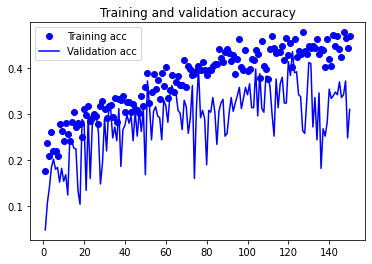

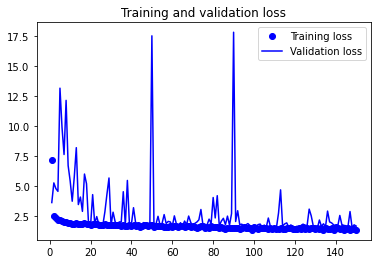

In [ ]:
plot_loss_acc()

### **Dropout** <a class="anchor" id="drop"></a>

The next hyperparameter that I will tune is Dropout. 

Dropout is a technique to prevent accidental patterns. This is done by adding a dropout layer which will randomly set to zero a number of outputs features during a model training. This technique makes sure that no patterns will emerge since that the zeroed features are randomly selected. The number of outputs affected is dictated by the dropout rate. In my models I will use dropout rates of 0.2 and 0.5. This will translate in a drop of, respectively, 20% and 50% of output features set to zero.

Each model definition can be seen bellow. 

#### **Drop1 Model (20%)** <a class="anchor" id="drop1model"></a>

In [ ]:
model = build_model_dropout(32, 64, 0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 22s 865ms/step - loss: 2.0115 - acc: 0.2300 - val_loss: 1.8115 - val_acc: 0.2560
Epoch 2/150
25/25 [==============================] - 21s 857ms/step - loss: 1.8496 - acc: 0.2480 - val_loss: 1.8430 - val_acc: 0.2500
Epoch 3/150
25/25 [==============================] - 21s 855ms/step - loss: 1.8450 - acc: 0.2540 - val_loss: 1.9097 - val_acc: 0.2360
Epoch 4/150
25/25 [==============================] - 21s 855ms/step - loss: 1.8387 - acc: 0.2400 - val_loss: 1.8207 - val_acc: 0.2300
Epoch 5/150
25/25 [==============================] - 21s 863ms/step - loss: 1.8358 - acc: 0.2860 - val_loss: 1.8788 - val_acc: 0.2540
Epoch 6/150
25/25 [==============================] - 21s 859ms/step - loss: 1.8201 - acc: 0.2580 - val_loss: 1.7792 - val_acc: 0.2440
Epoch 7/150
25/25 [==============================] - 21s 859ms/step - loss: 1.7984 - acc: 0.2680 - val_loss: 1.7749 - val_acc: 0.2820
Epoch 8/150
25/25 [==============================] - 21s 859ms

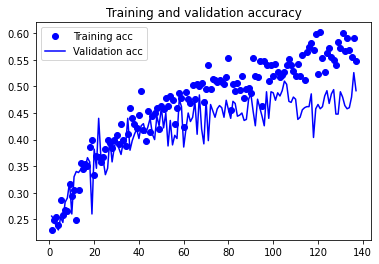

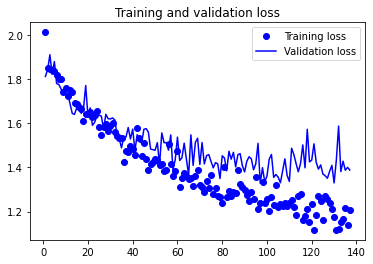

In [ ]:
plot_loss_acc()

#### **Drop2 Model (50%)** <a class="anchor" id="drop2model"></a>

In [ ]:
model = build_model_dropout(32, 64, 0.5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 24s 895ms/step - loss: 1.9711 - acc: 0.1940 - val_loss: 1.8461 - val_acc: 0.1800
Epoch 2/150
25/25 [==============================] - 22s 895ms/step - loss: 1.8595 - acc: 0.2560 - val_loss: 1.8215 - val_acc: 0.2400
Epoch 3/150
25/25 [==============================] - 22s 897ms/step - loss: 1.8324 - acc: 0.2060 - val_loss: 1.8091 - val_acc: 0.3060
Epoch 4/150
25/25 [==============================] - 22s 871ms/step - loss: 1.8153 - acc: 0.2880 - val_loss: 1.7692 - val_acc: 0.2800
Epoch 5/150
25/25 [==============================] - 22s 878ms/step - loss: 1.8126 - acc: 0.2500 - val_loss: 1.8092 - val_acc: 0.2520
Epoch 6/150
25/25 [==============================] - 22s 878ms/step - loss: 1.7849 - acc: 0.2500 - val_loss: 1.7690 - val_acc: 0.3060
Epoch 7/150
25/25 [==============================] - 22s 878ms/step - loss: 1.7702 - acc: 0.2740 - val_loss: 1.7608 - val_acc: 0.2240
Epoch 8/150
25/25 [==============================] - 22s 879ms

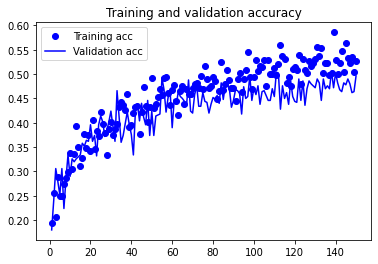

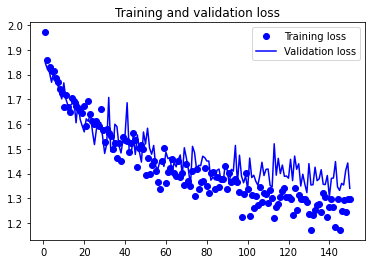

In [ ]:
plot_loss_acc()

### **Tunning the learning rate** <a class="anchor" id="learning"></a>

The third and final hyperparameter tuned is the learning rate of the optimizer.

The learning rate of the chosen optimizer will regulate how the weights of the network are updated in relation to the validation loss. Its default value is 0.001. I will experiment three different values: 0.005, 0.1 and 0.001. By having this range of learning rate I expect to better understand the best value to find the optimal set of weights. All models will have a dropout rate of 0.2.

#### **LR1 Model (0.005)** <a class="anchor" id="lr1model"></a>

In [ ]:
model = build_model_learning_rate(32,64,0.2,0.005)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 23s 889ms/step - loss: 6.3532 - acc: 0.2117 - val_loss: 1.8533 - val_acc: 0.2380
Epoch 2/150
25/25 [==============================] - 22s 880ms/step - loss: 1.8163 - acc: 0.2900 - val_loss: 1.8340 - val_acc: 0.1400
Epoch 3/150
25/25 [==============================] - 22s 883ms/step - loss: 1.9223 - acc: 0.2020 - val_loss: 1.8372 - val_acc: 0.1660
Epoch 4/150
25/25 [==============================] - 22s 870ms/step - loss: 1.8574 - acc: 0.2140 - val_loss: 1.8319 - val_acc: 0.1660
Epoch 5/150
25/25 [==============================] - 22s 871ms/step - loss: 1.8474 - acc: 0.2140 - val_loss: 1.8169 - val_acc: 0.2540
Epoch 6/150
25/25 [==============================] - 22s 871ms/step - loss: 1.9626 - acc: 0.2340 - val_loss: 1.8162 - val_acc: 0.2220
Epoch 7/150
25/25 [==============================] - 22s 868ms/step - loss: 1.8093 - acc: 0.2780 - val_loss: 1.8137 - val_acc: 0.2540
Epoch 8/150
25/25 [==============================] - 21s 866ms

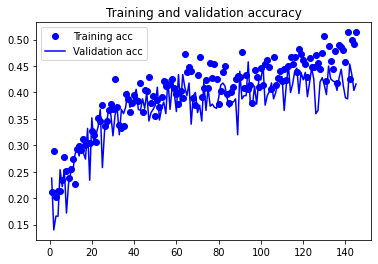

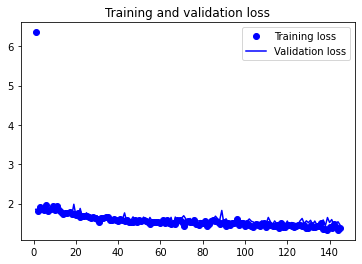

In [ ]:
plot_loss_acc()

#### **LR2 Model (0.01)** <a class="anchor" id="lr2model"></a>

In [ ]:
model = build_model_learning_rate(32,64,0.2,0.01)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 23s 889ms/step - loss: 44.8299 - acc: 0.2300 - val_loss: 1.8511 - val_acc: 0.2540
Epoch 2/150
25/25 [==============================] - 22s 886ms/step - loss: 1.8566 - acc: 0.2320 - val_loss: 1.8025 - val_acc: 0.2540
Epoch 3/150
25/25 [==============================] - 22s 878ms/step - loss: 1.7949 - acc: 0.2860 - val_loss: 1.9380 - val_acc: 0.2280
Epoch 4/150
25/25 [==============================] - 22s 870ms/step - loss: 3.0489 - acc: 0.2700 - val_loss: 1.8120 - val_acc: 0.2600
Epoch 5/150
25/25 [==============================] - 22s 893ms/step - loss: 2.0734 - acc: 0.2520 - val_loss: 1.7909 - val_acc: 0.2800
Epoch 6/150
25/25 [==============================] - 22s 884ms/step - loss: 1.8361 - acc: 0.2460 - val_loss: 1.7957 - val_acc: 0.2560
Epoch 7/150
25/25 [==============================] - 22s 881ms/step - loss: 1.8213 - acc: 0.2620 - val_loss: 1.7930 - val_acc: 0.2540
Epoch 8/150
25/25 [==============================] - 22s 876m

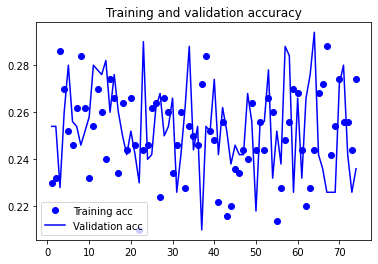

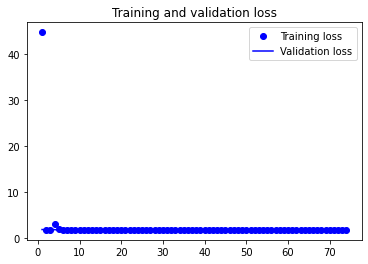

In [ ]:
plot_loss_acc()

#### **LR3 Model (0.001)**

In [ ]:
model = build_model_learning_rate(32,64,0.2,0.001)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 23s 905ms/step - loss: 2.0372 - acc: 0.1900 - val_loss: 1.8320 - val_acc: 0.1620
Epoch 2/150
25/25 [==============================] - 22s 883ms/step - loss: 1.8472 - acc: 0.2440 - val_loss: 1.8493 - val_acc: 0.1900
Epoch 3/150
25/25 [==============================] - 23s 912ms/step - loss: 1.8344 - acc: 0.2500 - val_loss: 1.7751 - val_acc: 0.2800
Epoch 4/150
25/25 [==============================] - 22s 903ms/step - loss: 1.7880 - acc: 0.2900 - val_loss: 1.7946 - val_acc: 0.2240
Epoch 5/150
25/25 [==============================] - 22s 905ms/step - loss: 1.8227 - acc: 0.2240 - val_loss: 1.8049 - val_acc: 0.2760
Epoch 6/150
25/25 [==============================] - 22s 892ms/step - loss: 1.7972 - acc: 0.2700 - val_loss: 1.8336 - val_acc: 0.2320
Epoch 7/150
25/25 [==============================] - 22s 901ms/step - loss: 1.7737 - acc: 0.2600 - val_loss: 1.8195 - val_acc: 0.2500
Epoch 8/150
25/25 [==============================] - 22s 906ms

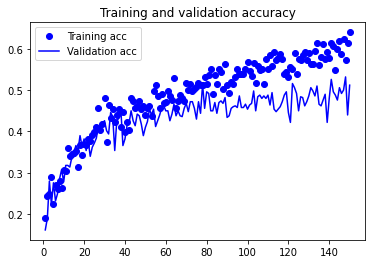

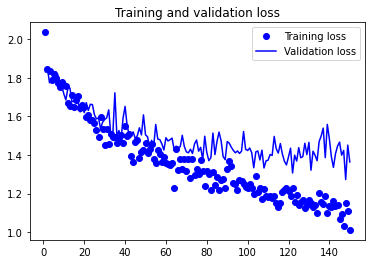

In [ ]:
plot_loss_acc()

### **ADAM optimizer**

#### **ADAM 0.2**

In [ ]:
model = build_model_adam_relu(32, 64, 0.2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 64)      

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 23s 889ms/step - loss: 1.8930 - acc: 0.2760 - val_loss: 1.8800 - val_acc: 0.1760
Epoch 2/150
25/25 [==============================] - 22s 875ms/step - loss: 1.8555 - acc: 0.1820 - val_loss: 1.8184 - val_acc: 0.2560
Epoch 3/150
25/25 [==============================] - 22s 882ms/step - loss: 1.7819 - acc: 0.2980 - val_loss: 1.8207 - val_acc: 0.2560
Epoch 4/150
25/25 [==============================] - 22s 883ms/step - loss: 1.8141 - acc: 0.2460 - val_loss: 1.8193 - val_acc: 0.2500
Epoch 5/150
25/25 [==============================] - 22s 884ms/step - loss: 1.8293 - acc: 0.2140 - val_loss: 1.8257 - val_acc: 0.1540
Epoch 6/150
25/25 [==============================] - 22s 877ms/step - loss: 1.7925 - acc: 0.2660 - val_loss: 1.7949 - val_acc: 0.2360
Epoch 7/150
25/25 [==============================] - 22s 883ms/step - loss: 1.8035 - acc: 0.2480 - val_loss: 1.7855 - val_acc: 0.2600
Epoch 8/150
25/25 [==============================] - 22s 877ms

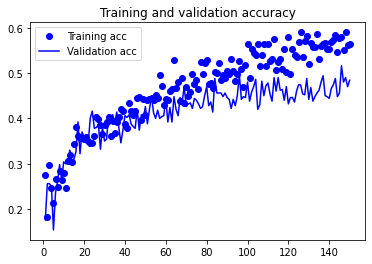

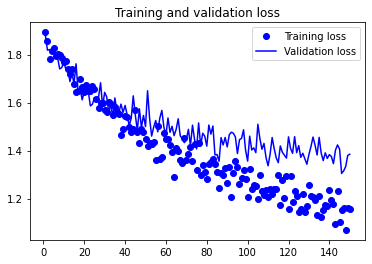

In [ ]:
plot_loss_acc()

### **ADAM Leaky Relu**

In [ ]:
model = build_model_adam_leakyrelu(32, 64, 0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 25s 902ms/step - loss: 1.8837 - acc: 0.2100 - val_loss: 1.7933 - val_acc: 0.2880
Epoch 2/150
25/25 [==============================] - 22s 871ms/step - loss: 1.8272 - acc: 0.2580 - val_loss: 1.7816 - val_acc: 0.2660
Epoch 3/150
25/25 [==============================] - 23s 919ms/step - loss: 1.8393 - acc: 0.2260 - val_loss: 1.7686 - val_acc: 0.2840
Epoch 4/150
25/25 [==============================] - 21s 856ms/step - loss: 1.8046 - acc: 0.2720 - val_loss: 1.7981 - val_acc: 0.1980
Epoch 5/150
25/25 [==============================] - 21s 864ms/step - loss: 1.7522 - acc: 0.2740 - val_loss: 1.7330 - val_acc: 0.2720
Epoch 6/150
25/25 [==============================] - 21s 863ms/step - loss: 1.7988 - acc: 0.2840 - val_loss: 1.7323 - val_acc: 0.2760
Epoch 7/150
25/25 [==============================] - 21s 860ms/step - loss: 1.7355 - acc: 0.2880 - val_loss: 1.6853 - val_acc: 0.3440
Epoch 8/150
25/25 [==============================] - 21s 861ms

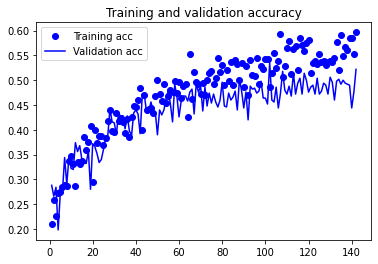

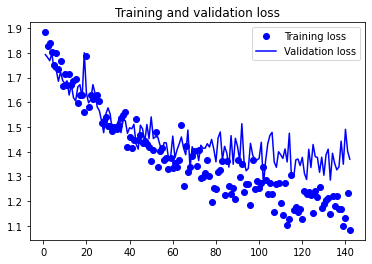

In [ ]:
plot_loss_acc()

In [ ]:
model = build_model_L1L2 (32, 64, 0.5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model = model = train_epochs(model, 150)

Epoch 1/150
25/25 [==============================] - 23s 894ms/step - loss: 4.6368 - acc: 0.2240 - val_loss: 2.6267 - val_acc: 0.2460
Epoch 2/150
25/25 [==============================] - 22s 886ms/step - loss: 2.5520 - acc: 0.2440 - val_loss: 2.6018 - val_acc: 0.2340
Epoch 3/150
25/25 [==============================] - 25s 999ms/step - loss: 2.5012 - acc: 0.2240 - val_loss: 2.6303 - val_acc: 0.2640
Epoch 4/150
25/25 [==============================] - 22s 887ms/step - loss: 2.5125 - acc: 0.2400 - val_loss: 2.5298 - val_acc: 0.1760
Epoch 5/150
25/25 [==============================] - 22s 885ms/step - loss: 2.4643 - acc: 0.2660 - val_loss: 2.4522 - val_acc: 0.2600
Epoch 6/150
25/25 [==============================] - 22s 889ms/step - loss: 2.4931 - acc: 0.2280 - val_loss: 2.4360 - val_acc: 0.2780
Epoch 7/150
25/25 [==============================] - 22s 884ms/step - loss: 2.4563 - acc: 0.2320 - val_loss: 2.4767 - val_acc: 0.2260
Epoch 8/150
25/25 [==============================] - 22s 886ms

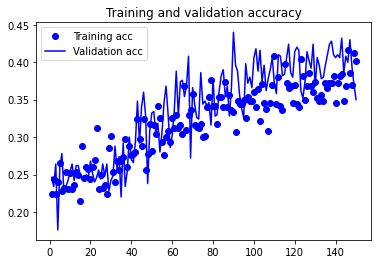

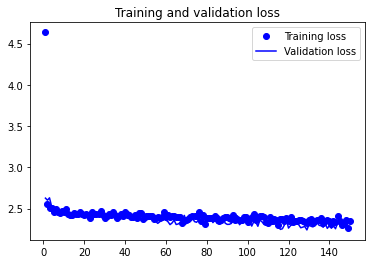

In [ ]:
plot_loss_acc()

## **Results comparison** <a class="anchor" id="results"></a>

Next, I have gathered all the results for the 11 models created.

| Model ID  | Model Name | Optimal Epoch  | Validation Loss  | Validation Accuracy | Early stopping | Optimizer
| ------------ | ------------ | ------------ | ------------ | ------------ |------------ |------------ 
| ReLU1_stat 		| baseline  |107 | 1.5870 | 44.40% | 147 | RMSprop
| ReLU2_out | Outfits   |   88  |   1.2883  |   52.20%| 128 | RMSprop
| ReLU3_bat | Batch     |   122  |   1.4374  |   43.60%| 150 | RMSprop
| ReLU4_drop1 |Drop1 (0.2)|   97  |   1.3877  |   49.20%| 137 | RMSprop
| ReLU5_drop2 |Drop2 (0.5)|   140  |   1.3070   |   50.20%| 150 | RMSprop
| ReLU6_LR1 |LR1 (0.005)|  105  |   1.4527  |   41.60%|  145 | RMSprop
| ReLU7_LR2 | LR2 (0.01) |  34  |   1.8116  |   23.60% | 74 | RMSprop
| ReLU8_LR3 | LR3 (0.001) |  122  |   1.3066  |   51.60% | 150 | RMSprop
| ReLU9_Adam | Adam (0.2) |  146  |   1.3052  |   51.60% | 150 | Adam
| ReLU10_Adam_leaky | Adam (0.2) |  102  |   1.3698  |   52.20% | 142 | Adam (LeakyReLU activation)
| ReLU11_L1L2 | L1+L2 (0.001), (0.5) |  116  |   2.2477  |   40.60% | 150 | RMSprop



From the model comparison table above, several conclusions can be produced. All the models trained for 150 epochs, on a balanced dataset. From the 11 models trained, I acknowledge that: 

*	The average validation accuracy was 45.53 %
*	The average validation loss was 1.5000
*	Out of the three hyperparameters explored, Learning Rate achieved the best results.
*	Model ReLU2_out got the lowest validation loss and the highest validation accuracy.

It is natural then for model ReLU2_out to be chosen as the final model.


### **Final model** <a class="anchor" id="finalmodel"></a>

With the results produced and evaluated, ReLU2_out model was picked as the best model to be used as final model, with 32,64 and 128 as arguments. I will train for the optimal number of epochs: 128.

In [34]:
final_model = build_model_outfits(32,64,128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [35]:
history = train_final(final_model, 128)

Epoch 1/128
25/25 [==============================] - 19s 663ms/step - loss: 2.0404 - acc: 0.1840
Epoch 2/128
25/25 [==============================] - 17s 660ms/step - loss: 1.8520 - acc: 0.2460
Epoch 3/128
25/25 [==============================] - 16s 659ms/step - loss: 1.8799 - acc: 0.2300
Epoch 4/128
25/25 [==============================] - 16s 658ms/step - loss: 1.8168 - acc: 0.2540
Epoch 5/128
25/25 [==============================] - 17s 659ms/step - loss: 1.8289 - acc: 0.2340
Epoch 6/128
25/25 [==============================] - 16s 655ms/step - loss: 1.8279 - acc: 0.2220
Epoch 7/128
25/25 [==============================] - 16s 657ms/step - loss: 1.8122 - acc: 0.2200
Epoch 8/128
25/25 [==============================] - 16s 657ms/step - loss: 1.7930 - acc: 0.2680
Epoch 9/128
25/25 [==============================] - 16s 655ms/step - loss: 1.7847 - acc: 0.2480
Epoch 10/128
25/25 [==============================] - 16s 656ms/step - loss: 1.7574 - acc: 0.2920
Epoch 11/128
25/25 [=========

In [36]:
test_loss, test_acc = final_model.evaluate(test_generator, steps=50)

# print final model accuracy
print('test acc:', test_acc)

50/50 [==============================] - 9s 180ms/step - loss: 1.2117 - acc: 0.5420
test acc: 0.5419999957084656


## **References** <a class="anchor" id="references"></a>

[1] Norman, J., 2022. Invention of the Image Scanner; Creation of the First Digital Image : History of Information. [online] Historyofinformation.com. 
Available at: <https://www.historyofinformation.com/detail.php?entryid=2332> [Accessed 21 January 2022].

[2] Ibm.com. 2022. What is Computer Vision? | IBM. [online] Available at: <https://www.ibm.com/topics/computer-vision> [Accessed 19 January 2022].

[3] Chollet, F., 2021. Deep Learning with Python, Second Edition. 2nd ed. Shelter Island, NY: Manning Publications, pp.111-115.

[4] Chollet, F., 2021. Deep Learning with Python, Second Edition. 2nd ed. Shelter Island, NY: Manning Publications, pp.260.
